In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import random

df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
tcl = ['TCGA-5U-AB0D', 'TCGA-ZB-A966', 'TCGA-3S-A8YW', 'TCGA-XM-A8R8', 'TCGA-XU-A933', 'TCGA-XU-A936', 'TCGA-ZC-AAA7', 'TCGA-5G-A9ZZ']
nontcl = list(set(df.columns) - set(tcl))

FileNotFoundError: File b'/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt' does not exist

In [5]:
def clustertxt(fh):
    with open(fh, 'r') as clus:
        lis = [line.strip() for line in clus]
    return lis

In [8]:
def calcstats(_df, list1=tcl, list1name='ipl_avg_TC', list2=nontcl, list2name='ipl_avg_nonTC'):
    df = _df.copy()
    for idx, row in df.iterrows():
        grp1 = df.loc[idx, list1]
        grp2 = df.loc[idx, list2]
        df.loc[idx, 'ks_d'] = stats.ks_2samp(grp1, grp2)[0]
        df.loc[idx, 'ks_p'] = stats.ks_2samp(grp1, grp2)[1]
        df.loc[idx, 'tt_s'] = stats.ttest_ind(grp1, grp2)[0]
        df.loc[idx, 'tt_p'] = stats.ttest_ind(grp1, grp2)[1]
        df.loc[idx, 'avg_grp1'] = grp1.mean()
        df.loc[idx, 'avg_grp2'] = grp2.mean()
        
    df = df.loc[:, 'ks_d':'avg_grp2'].sort(['avg_grp1'], ascending=[False])
    df.columns = ['ks_d', 'ks_p', 'tt_s', 'tt_p', list1name, list2name]

    model = pd.ols(y=df[list1name], x=df[list1name])
    df['y_hat'] = model.y_fitted
    df['resid'] = model.resid

    return df

In [67]:
def joint_annotate(df, title, x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', annotate_col='resid', annotate_n=5):
    g = sns.jointplot(x_name, y_name, data=df, kind="reg",
                      xlim=(-10, 10), ylim=(-10, 10), color="r", size=10)

    head = df.sort_values(by=[annotate_col], ascending=[False]).head(annotate_n)
    tail = df.sort_values(by=[annotate_col], ascending=[False]).tail(annotate_n)

    def ann(row, x_name,y_name):
        ind = row[0]
        r = row[1]
        plt.gca().annotate(ind, xy=(r[x_name], r[y_name]), 
                xytext=(2,2) , textcoords ="offset points", )

    for row in head.iterrows():
        ann(row,x_name,y_name)
    for row in tail.iterrows():
        ann(row,x_name,y_name)
    g.fig.suptitle(title)
#     plt.show()

In [ ]:
def joint_annotate(df, title, x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', annotate_col='resid', annotate_n=5):
    g = sns.jointplot(x_name, y_name, data=df, kind="reg",
                      xlim=(-10, 10), ylim=(-10, 10), color="r", size=7)

    head = df.sort_values(by=[annotate_col], ascending=[False]).head(annotate_n)
    tail = df.sort_values(by=[annotate_col], ascending=[False]).tail(annotate_n)

    def ann(row, x_name,y_name):
        ind = row[0]
        r = row[1]
        plt.gca().annotate(ind, xy=(r[x_name], r[y_name]), 
                xytext=(2,2) , textcoords ="offset points", )

    for row in head.iterrows():
        ann(row,x_name,y_name)
    for row in tail.iterrows():
        ann(row,x_name,y_name)
    g.fig.suptitle(title)
#     plt.show()

In [7]:
sample_df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/sample_patient_join.tab', index_col='patient_id')
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')

In [8]:
# stage I & II vs stage III & IV
early = list(sample_df.loc[sample_df['masaoka_stage'].isin(['I','IIa','IIb'])].index)
late = list(sample_df.loc[sample_df['masaoka_stage'].isin(['III','IVa','IVb'])].index)

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  app.launch_new_instance()


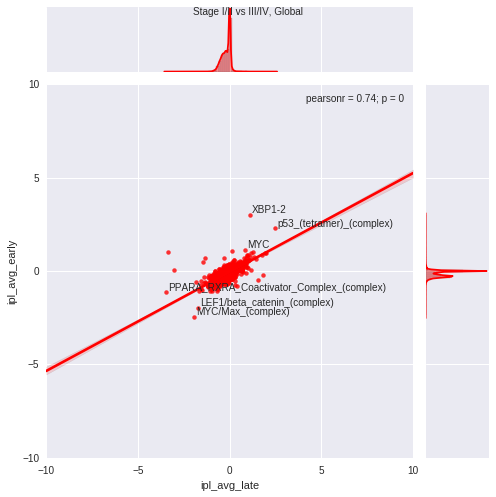

In [9]:
# global stage comparison
df_2 = df.copy()
stage = calcstats(df_2, list1=early, list1name='ipl_avg_early', list2=late, list2name='ipl_avg_late')

%matplotlib inline
joint_annotate(stage, title='Stage I/II vs III/IV, Global', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=3)

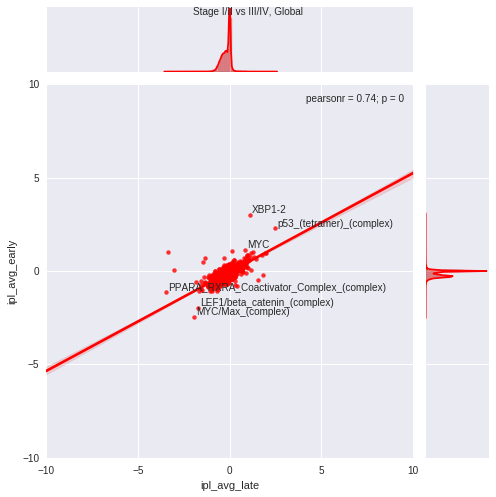

In [10]:
%matplotlib inline
joint_annotate(stage, title='Stage I/II vs III/IV, Global', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=3)

In [11]:
stage.sort_values(by=['ipl_avg_late'])

,ks_d,ks_p,tt_s,tt_p,ipl_avg_early,ipl_avg_late,y_hat,resid
Gene,,,,,,,,
PPARA_RXRA_Coactivator_Complex_(complex),0.175793,0.184632,NaN,NaN,-1.142784,-3.456711,-1.142784,-4.440892e-16
MYB,0.284136,0.003970,NaN,NaN,1.048335,-3.354755,1.048335,4.440892e-16
FOXM1,0.230552,0.033256,NaN,NaN,0.041204,-3.045851,0.041204,6.245005e-17
MYC/Max_(complex),0.164512,0.247920,NaN,NaN,-2.441627,-1.958740,-2.441627,-8.881784e-16
NFATC2,0.348766,0.000170,NaN,NaN,-0.591293,-1.860615,-0.591293,-2.220446e-16
LEF1/beta_catenin_(complex),0.197180,0.099909,NaN,NaN,-1.962988,-1.707407,-1.962988,-6.661338e-16
FOXM1C/SP1_(complex),0.328790,0.000482,NaN,NaN,-1.047870,-1.689264,-1.047870,-4.440892e-16
IL23/IL23R/JAK2/TYK2_(complex),0.262985,0.009685,NaN,NaN,-0.940091,-1.571408,-0.940091,-3.330669e-16
FOXA2,0.164982,0.244995,NaN,NaN,-0.740268,-1.563363,-0.740268,-2.220446e-16


In [6]:
# a-like vs all else
a_clus = clustertxt('/home/tjm/Documents/tcga/thym/a_like.txt')

a_early = list(set(early).intersection(a_clus))
a_late = list(set(late).intersection(a_clus))

NameError: name 'early' is not defined

In [13]:
df_2 = df.copy()
a_stage = calcstats(df_2, list1=a_early, list1name='ipl_avg_early', list2=a_late, list2name='ipl_avg_late')

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


In [14]:
a_stage.sort_values(by=['ipl_avg_late'], ascending=True).head()

,ks_d,ks_p,tt_s,tt_p,ipl_avg_early,ipl_avg_late,y_hat,resid
Gene,,,,,,,,
MYC/Max_(complex),0.500000,0.403594,1.334959,0.214673,-15.842429,-17.903125,-15.842429,-7.105427e-15
MYB,0.571429,0.249525,1.595896,0.144976,-11.712347,-13.350600,-11.712347,-5.329071e-15
FOXM1,0.464286,0.498593,-1.289445,0.229394,-8.350130,-7.943107,-8.350130,-3.552714e-15
E2F1/DP_(complex),0.428571,0.602418,-0.931278,0.376015,-5.830019,-5.383313,-5.830019,-2.664535e-15
FOXA2,0.500000,0.403594,-0.081144,0.937103,-5.021940,-4.989113,-5.021940,-2.664535e-15


In [15]:
a_stage.to_csv('earlyVlate_aCLus')
ab_stage.to_csv('earlyVlate_abCLus')
b_stage.to_csv('earlyVlate_bCLus')
c_stage.to_csv('earlyVlate_cCLus')

NameError: name 'ab_stage' is not defined

(0.92948465116068157, 0.0)


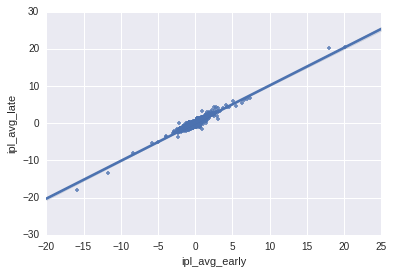

In [16]:
%matplotlib inline
x, y = pd.Series(a_stage.ipl_avg_early, name="ipl_avg_early"), pd.Series(a_stage.ipl_avg_late, name="ipl_avg_late")
ax = sns.regplot(x=x, y=y, marker="+")
print(stats.pearsonr(x,y))

In [62]:
a_stage.head()

,ks_d,ks_p,tt_s,tt_p,ipl_avg_early,ipl_avg_late,y_hat,resid
Gene,,,,,,,,
p53_(tetramer)_(complex),0.571429,0.249525,-0.111059,0.914007,20.128714,20.350025,20.128714,1.065814e-14
XBP1-2,0.607143,0.191061,-1.365827,0.205149,17.961486,20.330750,17.961486,7.105427e-15
dNp63a_(tetramer)_(complex),0.321429,0.897244,0.815076,0.436066,7.401174,6.685210,7.401174,3.552714e-15
HIF1A/ARNT_(complex),0.357143,0.811417,0.466811,0.651729,6.908153,6.467855,6.908153,2.664535e-15
TAp73a_(tetramer)_(complex),0.250000,0.988590,0.357774,0.728759,6.606253,6.335843,6.606253,2.664535e-15


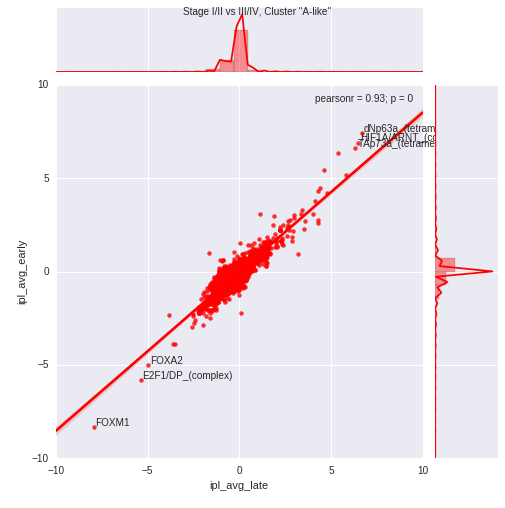

In [17]:
%matplotlib inline
joint_annotate(a_stage, title='Stage I/II vs III/IV, Cluster "A-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=5)

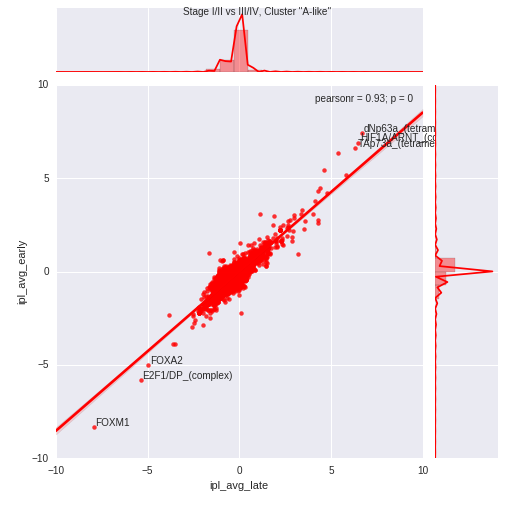

In [18]:
%matplotlib inline
joint_annotate(a_stage, title='Stage I/II vs III/IV, Cluster "A-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='y_hat', annotate_n=5)

In [19]:
# ab-like vs all else
ab_clus = clustertxt('/home/tjm/Documents/tcga/thym/ab_like.txt')

ab_early = list(set(early).intersection(ab_clus))
ab_late = list(set(late).intersection(ab_clus))

In [20]:
df_2 = df.copy()
ab_stage = calcstats(df_2, list1=ab_early, list1name='ipl_avg_early', list2=ab_late, list2name='ipl_avg_late')

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


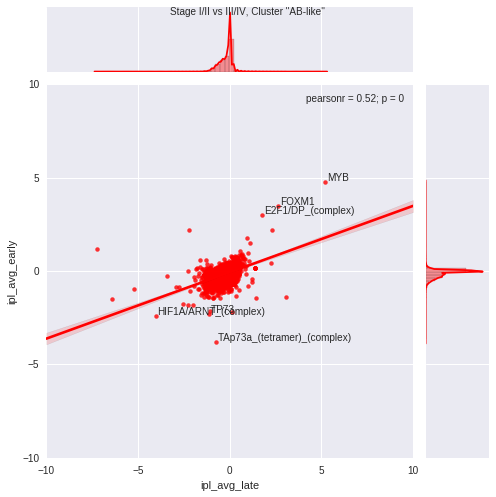

In [21]:
%matplotlib inline
joint_annotate(ab_stage, title='Stage I/II vs III/IV, Cluster "AB-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=3)

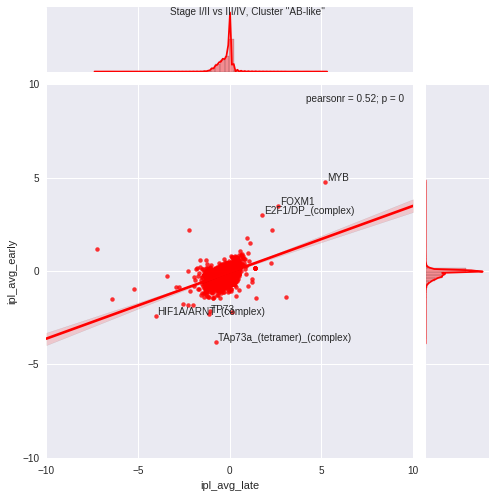

In [22]:
%matplotlib inline
joint_annotate(ab_stage, title='Stage I/II vs III/IV, Cluster "AB-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='y_hat', annotate_n=3)

In [23]:
# b-like vs all else
b_clus = clustertxt('/home/tjm/Documents/tcga/thym/b_like.txt')

b_early = list(set(early).intersection(b_clus))
b_late = list(set(late).intersection(b_clus))

In [24]:
df_2 = df.copy()
b_stage = calcstats(df_2, list1=b_early, list1name='ipl_avg_early', list2=b_late, list2name='ipl_avg_late')

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


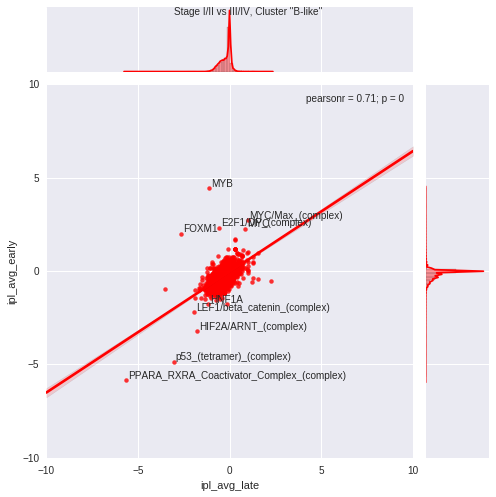

In [25]:
%matplotlib inline
joint_annotate(b_stage, title='Stage I/II vs III/IV, Cluster "B-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=5)

In [26]:
# c-like vs all else
c_clus = clustertxt('/home/tjm/Documents/tcga/thym/c_like.txt')

c_early = list(set(early).intersection(c_clus))
c_late = list(set(late).intersection(c_clus))

In [27]:
dicho = [a_early, a_late, ab_early, ab_late, b_early, b_late, c_early, c_late]
name = ['a_early', 'a_late', 'ab_early', 'ab_late', 'b_early', 'b_late', 'c_early', 'c_late']

for idx, l in enumerate(dicho):
    with open('dicho/'+name[idx], 'w') as fh:
        for sample in l:
            fh.write(sample+'\n')
    

In [28]:
df_2 = df.copy()
c_stage = calcstats(df_2, list1=c_early, list1name='ipl_avg_early', list2=c_late, list2name='ipl_avg_late')

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


In [29]:
c_stage.sort_values(by=['ks_d','resid'], ascending=False).head()

,ks_d,ks_p,tt_s,tt_p,ipl_avg_early,ipl_avg_late,y_hat,resid
Gene,,,,,,,,
JAM-A_Homodimer_(complex),1.0,0.011066,-0.683623,0.516197,0.246851,0.296257,0.246851,2.775558e-17
FASLG/FAS_(trimer)/FADD/FADD/CFLIP_(complex),1.0,0.011066,2.216346,0.062212,0.239724,-0.258567,0.239724,2.775558e-17
Syndecan-2/PKC_delta_(complex),1.0,0.011066,3.477964,0.010295,0.237913,0.074796,0.237913,2.775558e-17
TAp73a_(tetramer)/MYC_(complex),1.0,0.011066,-3.044572,0.018726,0.231034,1.249753,0.231034,2.775558e-17
prostaglandin_biosynthetic_process_(abstract),1.0,0.011066,1.858318,0.105472,0.208900,0.153861,0.208900,2.775558e-17


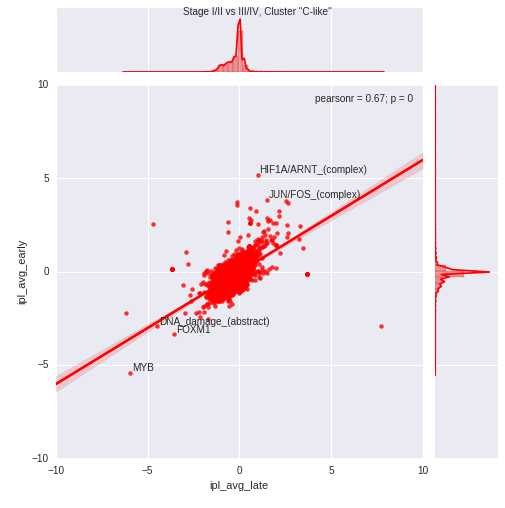

In [30]:
%matplotlib inline
joint_annotate(c_stage, title='Stage I/II vs III/IV, Cluster "C-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='y_hat', annotate_n=3)

**below lies the dichotomies for cluster islands vs all**

In [48]:
# cluster a-like vs all
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')

a_clus = clustertxt('/home/tjm/Documents/tcga/thym/a_like.txt')

notclus = list(set(df.columns) - set(a_clus))
a_v_all = calcstats(df, list1=a_clus, list1name='in_clus_ipl', list2=notclus, list2name='out_clus_ipl')
a_v_all['ipl_delta'] = a_v_all['in_clus_ipl'] - a_v_all['out_clus_ipl']
a_v_all['ipl_abs'] = a_v_all['ipl_delta'].abs()
a = a_v_all.sort_values(by=['ks_d'], ascending=False).head(5)


/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


In [16]:
a_v_all.sort_values(by=['ks_d'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYC/Max/MIZ-1/ZO2_(complex),0.953704,4.190119e-09,-3.561522,0.000534,-0.823525,-0.054522,-0.823525,-3.330669e-16
SDF1/CXCR4_(complex),0.953704,4.190119e-09,-3.116255,0.002305,-0.363609,-0.093644,-0.363609,-2.775558e-16
ITGB4,0.944444,6.164939e-09,3.681267,0.000353,0.559256,-0.464658,0.559256,1.110223e-16
alpha6/beta4_Integrin_(complex),0.944444,6.164939e-09,5.003235,0.000002,0.504443,-0.667071,0.504443,1.110223e-16
hemidesmosome_assembly_(abstract),0.944444,6.164939e-09,3.907456,0.000157,0.188197,-0.001398,0.188197,-8.326673e-17


In [17]:
a_v_all.sort_values(by=['y_hat'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
p53_(tetramer)_(complex),0.870370,1.182082e-07,5.327396,4.896298e-07,20.209191,-0.153905,20.209191,7.105427e-15
XBP1-2,0.870370,1.182082e-07,7.002550,1.700332e-10,18.823036,0.747650,18.823036,7.105427e-15
dNp63a_(tetramer)_(complex),0.796296,1.780962e-06,5.332789,4.780753e-07,7.140824,0.316602,7.140824,2.664535e-15
HIF1A/ARNT_(complex),0.770202,4.372137e-06,4.707956,6.929959e-06,6.748045,-0.851359,6.748045,2.664535e-15
TAp73a_(tetramer)_(complex),0.844276,3.159175e-07,5.111948,1.257253e-06,6.507922,-1.042889,6.507922,1.776357e-15


In [98]:
a_v_all.sort_values(by=['resid'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid,ipl_delta,ipl_abs
Gene,,,,,,,,,,
p53_(tetramer)_(complex),0.870370,1.182082e-07,5.327396,4.896298e-07,20.209191,-0.153905,20.209191,7.105427e-15,20.363096,20.363096
XBP1-2,0.870370,1.182082e-07,7.002550,1.700332e-10,18.823036,0.747650,18.823036,7.105427e-15,18.075387,18.075387
dNp63a_(tetramer)_(complex),0.796296,1.780962e-06,5.332789,4.780753e-07,7.140824,0.316602,7.140824,2.664535e-15,6.824221,6.824221
HIF1A/ARNT_(complex),0.770202,4.372137e-06,4.707956,6.929959e-06,6.748045,-0.851359,6.748045,2.664535e-15,7.599404,7.599404
TAp63a_(tetramer)_(complex),0.796296,1.780962e-06,5.511258,2.153038e-07,5.138825,0.572378,5.138825,1.776357e-15,4.566447,4.566447


In [87]:
_a = a[['in_clus_ipl','out_clus_ipl','ks_p']].head(10)
_a['cluster'] ='a-like'

In [49]:
# cluster ab-like vs all
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
ab_clus = clustertxt('/home/tjm/Documents/tcga/thym/ab_like.txt')

notclus = list(set(df.columns) - set(ab_clus))
ab_v_all = calcstats(df, list1=ab_clus, list1name='in_clus_ipl', list2=notclus, list2name='out_clus_ipl')
ab_v_all['ipl_delta'] = ab_v_all['in_clus_ipl'] - ab_v_all['out_clus_ipl']
ab_v_all['ipl_abs'] = ab_v_all['ipl_delta'].abs()
ab = ab_v_all.sort_values(by=['y_hat'], ascending=False)


/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


In [20]:
ab_v_all.sort_values(by=['ks_d'], ascending=False).head()

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
Sema3E_bound_to_Plexin_D1_receptor_(complex),0.698614,1.101346e-12,NaN,NaN,0.011881,-0.723438,0.011881,-1.040834e-17
Sema3e/Plexin-D1_(complex),0.698614,1.101346e-12,NaN,NaN,0.011881,-0.723438,0.011881,-1.040834e-17
PRKCG,0.661242,2.081754e-11,NaN,NaN,0.276842,-0.552385,0.276842,-1.665335e-16
Activated_PKC_gamma_(complex),0.661242,2.081754e-11,NaN,NaN,0.239262,-0.521839,0.239262,-1.665335e-16
cPKC_(family),0.640446,9.962295e-11,NaN,NaN,0.115560,-0.063306,0.115560,-8.326673e-17


In [74]:
ab_v_all.sort_values(by=['y_hat'], ascending=False).head()

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.391802,0.000279,NaN,NaN,4.924049,-1.366209,4.924049,-3.552714e-15
FOXM1,0.422242,0.000066,NaN,NaN,3.488376,-2.003769,3.488376,-2.220446e-15
E2F1/DP_(complex),0.402954,0.000167,NaN,NaN,2.997113,-0.831186,2.997113,-1.776357e-15
E2F1,0.402954,0.000167,NaN,NaN,2.368840,-0.082674,2.368840,-1.776357e-15
DNA_damage_(abstract),0.446353,0.000020,NaN,NaN,1.877226,-0.381065,1.877226,-1.332268e-15


In [21]:
ab_v_all.sort_values(by=['resid'], ascending=False).head()

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
TAp73a_(tetramer)_(complex),0.438819,0.000029,NaN,NaN,-3.512037,1.258691,-3.512037,2.220446e-15
HIF1A/ARNT_(complex),0.331525,0.003470,NaN,NaN,-2.574185,1.079102,-2.574185,1.776357e-15
TP73,0.407474,0.000135,NaN,NaN,-2.224353,0.038219,-2.224353,1.332268e-15
p53_(tetramer)_(complex),0.283906,0.018900,NaN,NaN,-2.092376,3.662967,-2.092376,1.332268e-15
STAT6_(dimer)_(complex),0.276371,0.024126,NaN,NaN,-2.049848,-0.189338,-2.049848,1.332268e-15


In [88]:
_ab = ab[['in_clus_ipl','out_clus_ipl','ks_p']].head(10)
_ab['cluster'] ='ab-like'

In [50]:
# cluster b-like vs all
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
b_clus = clustertxt('/home/tjm/Documents/tcga/thym/b_like.txt')

notclus = list(set(df.columns) - set(b_clus))
b_v_all = calcstats(df, list1=b_clus, list1name='in_clus_ipl', list2=notclus, list2name='out_clus_ipl')
b_v_all['ipl_delta'] = b_v_all['in_clus_ipl'] - b_v_all['out_clus_ipl']
b_v_all['ipl_abs'] = b_v_all['ipl_delta'].abs()

b = b_v_all.sort_values(by=['ks_d'], ascending=False)


/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


In [29]:
b_v_all.sort_values(by=['ks_d'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
VAV3,0.811634,5.683120e-17,NaN,NaN,0.179456,-0.206126,0.179456,0.000000e+00
PAK-2p34_RHG10_complex_(complex),0.790838,3.905078e-16,NaN,NaN,-0.174570,0.051496,-0.174570,0.000000e+00
ARHGAP10,0.790838,3.905078e-16,NaN,NaN,-0.993035,0.049421,-0.993035,0.000000e+00
perinuclear_PAK-2p34_RHG10_complex_(complex),0.790838,3.905078e-16,NaN,NaN,-0.174570,0.051496,-0.174570,0.000000e+00
TNFRSF21,0.789331,4.481679e-16,NaN,NaN,0.098139,-0.767845,0.098139,1.387779e-17
KCNC1,0.787824,5.142068e-16,NaN,NaN,0.292588,-0.598416,0.292588,0.000000e+00
AKR1B10,0.786317,5.898217e-16,NaN,NaN,0.346709,-0.605758,0.346709,0.000000e+00
CDH3,0.779687,1.075302e-15,NaN,NaN,0.231067,-0.668870,0.231067,0.000000e+00
SPHK1,0.779687,1.075302e-15,NaN,NaN,-0.650379,0.031106,-0.650379,0.000000e+00


In [30]:
b_v_all.sort_values(by=['y_hat'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.315853,6.239980e-03,NaN,NaN,3.908881,-0.852199,3.908881,0.0
MYC/Max_(complex),0.419228,7.699852e-05,NaN,NaN,3.020884,-4.458818,3.020884,0.0
E2F1/DP_(complex),0.247740,5.746533e-02,NaN,NaN,2.116339,-0.385224,2.116339,0.0
MYC,0.318867,5.586420e-03,NaN,NaN,2.104676,0.748535,2.104676,0.0
E2F1,0.252562,4.998172e-02,NaN,NaN,1.666716,0.272832,1.666716,0.0
FOXM1,0.242315,6.701571e-02,NaN,NaN,1.521866,-1.008067,1.521866,0.0
STAT6_(dimer)_(complex),0.542194,8.260114e-08,NaN,NaN,1.245573,-1.857905,1.245573,0.0
MIR17_(miRNA),0.395419,2.364177e-04,NaN,NaN,1.168495,-0.228726,1.168495,0.0
MIR338_(miRNA),0.395419,2.364177e-04,NaN,NaN,1.168495,-0.228726,1.168495,0.0


In [31]:
b_v_all.sort_values(by=['resid'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
CFLAR-2,0.228752,0.096965,NaN,NaN,-0.086576,-0.051383,-0.086576,1.387779e-17
DP1/2_(family),0.166365,0.400175,NaN,NaN,-0.081428,0.012606,-0.081428,1.387779e-17
Dynein_(DLC1)_on_microtubules_(complex),0.314346,0.006592,NaN,NaN,-0.089254,-0.365330,-0.089254,1.387779e-17
ZNF552,0.249548,0.054553,NaN,NaN,-0.089258,-0.396471,-0.089258,1.387779e-17
E3_K48-polyubiquitinated_substrate_(complex),0.281796,0.020250,NaN,NaN,-0.089310,0.093195,-0.089310,1.387779e-17
TACR2,0.302592,0.010027,NaN,NaN,-0.089350,-0.362317,-0.089350,1.387779e-17
Promyogenic_cadherins_(family),0.198915,0.202642,NaN,NaN,-0.089383,-0.018279,-0.089383,1.387779e-17
SREBF1,0.447559,0.000019,NaN,NaN,-0.089537,-0.451754,-0.089537,1.387779e-17
PTEN_(Mg2__cofactor)_(complex),0.393912,0.000253,NaN,NaN,-0.089578,-0.685658,-0.089578,1.387779e-17


In [78]:
b = b_v_all.sort_values(by=['ks_d'], ascending=False)
b[['in_clus_ipl','out_clus_ipl','ks_p']].head(5)

,in_clus_ipl,out_clus_ipl,ks_p
Gene,,,
VAV3,0.179456,-0.206126,5.683120e-17
PAK-2p34_RHG10_complex_(complex),-0.174570,0.051496,3.905078e-16
ARHGAP10,-0.993035,0.049421,3.905078e-16
perinuclear_PAK-2p34_RHG10_complex_(complex),-0.174570,0.051496,3.905078e-16
TNFRSF21,0.098139,-0.767845,4.481679e-16


In [89]:
_b = b[['in_clus_ipl','out_clus_ipl','ks_p']].head(10)
_b['cluster'] ='b-like'

In [51]:
# cluster c-like vs all
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
c_clus = clustertxt('/home/tjm/Documents/tcga/thym/c_like.txt')

notclus = list(set(df.columns) - set(c_clus))
c_v_all = calcstats(df, list1=b_clus, list1name='in_clus_ipl', list2=notclus, list2name='out_clus_ipl')
c_v_all['ipl_delta'] = c_v_all['in_clus_ipl'] - c_v_all['out_clus_ipl']
c_v_all['ipl_abs'] = c_v_all['ipl_delta'].abs()
c = c_v_all.sort_values(by=['ks_d'], ascending=False)

/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/tjm/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


In [28]:
c_v_all.sort_values(by=['ks_d'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
CYP2C18,0.546753,1.007174e-08,NaN,NaN,0.363199,-0.407371,0.363199,0.000000e+00
VAV3,0.539827,1.629345e-08,NaN,NaN,0.179456,-0.076166,0.179456,0.000000e+00
KCNC1,0.525108,4.437116e-08,NaN,NaN,0.292588,-0.290974,0.292588,0.000000e+00
IFT172,0.522944,5.129439e-08,NaN,NaN,0.324441,-0.352451,0.324441,0.000000e+00
NDUFS2,0.520779,5.926236e-08,NaN,NaN,0.172919,-0.318875,0.172919,0.000000e+00
Complex_I_-_49_kDa_subunit-4Fe-4S_cluster_complex_(complex),0.520779,5.926236e-08,NaN,NaN,0.120279,-0.312344,0.120279,1.387779e-17
PIR,0.518182,7.041844e-08,NaN,NaN,0.338366,-0.324291,0.338366,0.000000e+00
DGKG,0.516017,8.124997e-08,NaN,NaN,0.317659,-0.296927,0.317659,0.000000e+00
FBN3,0.516017,8.124997e-08,NaN,NaN,-0.912169,-0.205374,-0.912169,0.000000e+00


In [26]:
c_v_all.sort_values(by=['y_hat'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.182251,0.238942,NaN,NaN,3.908881,1.268354,3.908881,0.0
MYC/Max_(complex),0.285281,0.011014,NaN,NaN,3.020884,-2.156524,3.020884,0.0
E2F1/DP_(complex),0.167532,0.331088,NaN,NaN,2.116339,0.679273,2.116339,0.0
MYC,0.216450,0.100115,NaN,NaN,2.104676,1.137564,2.104676,0.0
E2F1,0.164069,0.355898,NaN,NaN,1.666716,0.861761,1.666716,0.0
FOXM1,0.144156,0.520059,NaN,NaN,1.521866,0.110717,1.521866,0.0
STAT6_(dimer)_(complex),0.380952,0.000187,NaN,NaN,1.245573,-0.906930,1.245573,0.0
MIR17_(miRNA),0.270563,0.018579,NaN,NaN,1.168495,0.168821,1.168495,0.0
MIR338_(miRNA),0.270563,0.018579,NaN,NaN,1.168495,0.168821,1.168495,0.0


In [27]:
c_v_all.sort_values(by=['resid'], ascending=False).head(10)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
CFLAR-2,0.131169,0.641473,NaN,NaN,-0.086576,-0.064454,-0.086576,1.387779e-17
DP1/2_(family),0.098268,0.917165,NaN,NaN,-0.081428,0.015473,-0.081428,1.387779e-17
Dynein_(DLC1)_on_microtubules_(complex),0.224242,0.080390,NaN,NaN,-0.089254,-0.290825,-0.089254,1.387779e-17
ZNF552,0.193506,0.182520,NaN,NaN,-0.089258,-0.329577,-0.089258,1.387779e-17
E3_K48-polyubiquitinated_substrate_(complex),0.174892,0.282333,NaN,NaN,-0.089310,0.035778,-0.089310,1.387779e-17
TACR2,0.246320,0.041386,NaN,NaN,-0.089350,-0.306292,-0.089350,1.387779e-17
Promyogenic_cadherins_(family),0.138961,0.567805,NaN,NaN,-0.089383,-0.039985,-0.089383,1.387779e-17
SREBF1,0.292208,0.008529,NaN,NaN,-0.089537,-0.330756,-0.089537,1.387779e-17
PTEN_(Mg2__cofactor)_(complex),0.212554,0.111397,NaN,NaN,-0.089578,-0.405367,-0.089578,1.387779e-17


In [82]:
c = c_v_all.sort_values(by=['ks_d'], ascending=False)
c[['in_clus_ipl','out_clus_ipl','ks_p']].head(5)

,in_clus_ipl,out_clus_ipl,ks_p
Gene,,,
CYP2C18,0.363199,-0.407371,1.007174e-08
VAV3,0.179456,-0.076166,1.629345e-08
KCNC1,0.292588,-0.290974,4.437116e-08
IFT172,0.324441,-0.352451,5.129439e-08
NDUFS2,0.172919,-0.318875,5.926236e-08


In [91]:
_c = c[['in_clus_ipl','out_clus_ipl','ks_p']].head(10)
_c['cluster'] = 'c-like'

In [73]:
c.sort_values(by=['ks_d'], ascending=False).head(10
                                                )

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
VAV3,0.811634,5.683120e-17,NaN,NaN,0.179456,-0.206126,0.179456,0.000000e+00
perinuclear_PAK-2p34_RHG10_complex_(complex),0.790838,3.905078e-16,NaN,NaN,-0.174570,0.051496,-0.174570,0.000000e+00
ARHGAP10,0.790838,3.905078e-16,NaN,NaN,-0.993035,0.049421,-0.993035,0.000000e+00
PAK-2p34_RHG10_complex_(complex),0.790838,3.905078e-16,NaN,NaN,-0.174570,0.051496,-0.174570,0.000000e+00
TNFRSF21,0.789331,4.481679e-16,NaN,NaN,0.098139,-0.767845,0.098139,1.387779e-17
KCNC1,0.787824,5.142068e-16,NaN,NaN,0.292588,-0.598416,0.292588,0.000000e+00
AKR1B10,0.786317,5.898217e-16,NaN,NaN,0.346709,-0.605758,0.346709,0.000000e+00
CDH3,0.779687,1.075302e-15,NaN,NaN,0.231067,-0.668870,0.231067,0.000000e+00
SPHK1,0.779687,1.075302e-15,NaN,NaN,-0.650379,0.031106,-0.650379,0.000000e+00


**below lies all y_hat together for all in vs out cluster dichotomies**

In [36]:
a_v_all.sort_values(by=['y_hat'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
p53_(tetramer)_(complex),0.870370,1.182082e-07,5.327396,4.896298e-07,20.209191,-0.153905,20.209191,7.105427e-15
XBP1-2,0.870370,1.182082e-07,7.002550,1.700332e-10,18.823036,0.747650,18.823036,7.105427e-15
dNp63a_(tetramer)_(complex),0.796296,1.780962e-06,5.332789,4.780753e-07,7.140824,0.316602,7.140824,2.664535e-15
HIF1A/ARNT_(complex),0.770202,4.372137e-06,4.707956,6.929959e-06,6.748045,-0.851359,6.748045,2.664535e-15
TAp73a_(tetramer)_(complex),0.844276,3.159175e-07,5.111948,1.257253e-06,6.507922,-1.042889,6.507922,1.776357e-15


In [37]:
ab_v_all.sort_values(by=['y_hat'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.391802,0.000279,NaN,NaN,4.924049,-1.366209,4.924049,-3.552714e-15
FOXM1,0.422242,0.000066,NaN,NaN,3.488376,-2.003769,3.488376,-2.220446e-15
E2F1/DP_(complex),0.402954,0.000167,NaN,NaN,2.997113,-0.831186,2.997113,-1.776357e-15
E2F1,0.402954,0.000167,NaN,NaN,2.368840,-0.082674,2.368840,-1.776357e-15
DNA_damage_(abstract),0.446353,0.000020,NaN,NaN,1.877226,-0.381065,1.877226,-1.332268e-15


In [38]:
b_v_all.sort_values(by=['y_hat'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.315853,0.006240,NaN,NaN,3.908881,-0.852199,3.908881,0.0
MYC/Max_(complex),0.419228,0.000077,NaN,NaN,3.020884,-4.458818,3.020884,0.0
E2F1/DP_(complex),0.247740,0.057465,NaN,NaN,2.116339,-0.385224,2.116339,0.0
MYC,0.318867,0.005586,NaN,NaN,2.104676,0.748535,2.104676,0.0
E2F1,0.252562,0.049982,NaN,NaN,1.666716,0.272832,1.666716,0.0


In [39]:
c_v_all.sort_values(by=['y_hat'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid
Gene,,,,,,,,
MYB,0.182251,0.238942,NaN,NaN,3.908881,1.268354,3.908881,0.0
MYC/Max_(complex),0.285281,0.011014,NaN,NaN,3.020884,-2.156524,3.020884,0.0
E2F1/DP_(complex),0.167532,0.331088,NaN,NaN,2.116339,0.679273,2.116339,0.0
MYC,0.216450,0.100115,NaN,NaN,2.104676,1.137564,2.104676,0.0
E2F1,0.164069,0.355898,NaN,NaN,1.666716,0.861761,1.666716,0.0


**below lies all ipl_delta together for all in vs out cluster dichotomies**

In [44]:
a_v_all.sort_values(by=['ipl_delta'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid,ipl_delta
Gene,,,,,,,,,
p53_(tetramer)_(complex),0.870370,1.182082e-07,5.327396,4.896298e-07,20.209191,-0.153905,20.209191,7.105427e-15,20.363096
XBP1-2,0.870370,1.182082e-07,7.002550,1.700332e-10,18.823036,0.747650,18.823036,7.105427e-15,18.075387
PPARA_RXRA_Coactivator_Complex_(complex),0.787037,2.457780e-06,4.732058,6.273749e-06,5.993565,-2.543661,5.993565,1.776357e-15,8.537225
HIF1A/ARNT_(complex),0.770202,4.372137e-06,4.707956,6.929959e-06,6.748045,-0.851359,6.748045,2.664535e-15,7.599404
TAp73a_(tetramer)_(complex),0.844276,3.159175e-07,5.111948,1.257253e-06,6.507922,-1.042889,6.507922,1.776357e-15,7.550811


In [45]:
b_v_all.sort_values(by=['ipl_delta'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid,ipl_delta
Gene,,,,,,,,,
MYC/Max_(complex),0.419228,7.699852e-05,NaN,NaN,3.020884,-4.458818,3.020884,0.0,7.479703
MYB,0.315853,6.239980e-03,NaN,NaN,3.908881,-0.852199,3.908881,0.0,4.761080
STAT6_(dimer)_(complex),0.542194,8.260114e-08,NaN,NaN,1.245573,-1.857905,1.245573,0.0,3.103478
FOXM1,0.242315,6.701571e-02,NaN,NaN,1.521866,-1.008067,1.521866,0.0,2.529933
E2F1/DP_(complex),0.247740,5.746533e-02,NaN,NaN,2.116339,-0.385224,2.116339,0.0,2.501563


In [46]:
ab_v_all.sort_values(by=['ipl_delta'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid,ipl_delta
Gene,,,,,,,,,
MYB,0.391802,0.000279,NaN,NaN,4.924049,-1.366209,4.924049,-3.552714e-15,6.290257
FOXM1,0.422242,0.000066,NaN,NaN,3.488376,-2.003769,3.488376,-2.220446e-15,5.492144
E2F1/DP_(complex),0.402954,0.000167,NaN,NaN,2.997113,-0.831186,2.997113,-1.776357e-15,3.828299
E2F1,0.402954,0.000167,NaN,NaN,2.368840,-0.082674,2.368840,-1.776357e-15,2.451514
DNA_damage_(abstract),0.446353,0.000020,NaN,NaN,1.877226,-0.381065,1.877226,-1.332268e-15,2.258291


In [47]:
c_v_all.sort_values(by=['ipl_delta'], ascending=False).head(5)

,ks_d,ks_p,tt_s,tt_p,in_clus_ipl,out_clus_ipl,y_hat,resid,ipl_delta
Gene,,,,,,,,,
MYC/Max_(complex),0.285281,0.011014,NaN,NaN,3.020884,-2.156524,3.020884,0.0,5.177409
MYB,0.182251,0.238942,NaN,NaN,3.908881,1.268354,3.908881,0.0,2.640527
STAT6_(dimer)_(complex),0.380952,0.000187,NaN,NaN,1.245573,-0.906930,1.245573,0.0,2.152503
FOXA1,0.459307,0.000003,NaN,NaN,0.960894,-0.719637,0.960894,0.0,1.680531
MYC/Max/MIZ-1_(complex),0.297835,0.006898,NaN,NaN,0.923876,-0.613228,0.923876,0.0,1.537105


**below lies all ipl_abs together for all in vs out cluster dichotomies**

In [83]:
a_df = a_v_all.sort_values(by=['ipl_abs'], ascending=False).drop(['tt_s','tt_p'], 1)
hkp_a = a_df.ix[['HRAS','KRAS','p53_(tetramer)_(complex)']]
hkp_a['like_cluster'] = 'A'

In [84]:
ab_df = ab_v_all.sort_values(by=['ipl_abs'], ascending=False).drop(['tt_s','tt_p'], 1)
hkp_ab = ab_df.ix[['HRAS','KRAS','p53_(tetramer)_(complex)']]
hkp_ab['like_cluster'] = 'AB'

In [85]:
b_df = b_v_all.sort_values(by=['ipl_abs'], ascending=False).drop(['tt_s','tt_p'], 1)
hkp_b = b_df.ix[['HRAS','KRAS','p53_(tetramer)_(complex)']]
hkp_b['like_cluster'] = 'B'

In [86]:
c_df = c_v_all.sort_values(by=['ipl_abs'], ascending=False).drop(['tt_s','tt_p'], 1)
hkp_c = c_df.ix[['HRAS','KRAS','p53_(tetramer)_(complex)']]
hkp_c['like_cluster'] = 'C'

In [94]:
pd.concat([a_df.head(10), ab_df.head(10), b_df.head(10), c_df.head(10)]).to_csv('top_cluster_abs.csv')

In [93]:
pd.concat([hkp_a, hkp_ab, hkp_b, hkp_c]).to_csv('top_cluster_hkp.csv')

In [93]:
top_cluster_ksd = pd.concat([_a,_ab,_b,_c])
top_cluster_ksd.to_csv('top_cluster_ks_d.csv')

In [94]:
top_cluster_ksd

,in_clus_ipl,out_clus_ipl,ks_p,cluster
Gene,,,,
MYC/Max/MIZ-1/ZO2_(complex),-0.823525,-0.054522,4.190119e-09,a-like
SDF1/CXCR4_(complex),-0.363609,-0.093644,4.190119e-09,a-like
ITGB4,0.559256,-0.464658,6.164939e-09,a-like
alpha6/beta4_Integrin_(complex),0.504443,-0.667071,6.164939e-09,a-like
hemidesmosome_assembly_(abstract),0.188197,-0.001398,6.164939e-09,a-like
Sema3E_bound_to_Plexin_D1_receptor_(complex),0.011881,-0.723438,1.101346e-12,ab-like
Sema3e/Plexin-D1_(complex),0.011881,-0.723438,1.101346e-12,ab-like
PRKCG,0.276842,-0.552385,2.081754e-11,ab-like
Activated_PKC_gamma_(complex),0.239262,-0.521839,2.081754e-11,ab-like


In [44]:
# thymic carcinoma vs non thymic carcinoma
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
tcl = ['TCGA-5U-AB0D', 'TCGA-ZB-A966', 'TCGA-3S-A8YW', 'TCGA-XM-A8R8', 'TCGA-XU-A933', 'TCGA-XU-A936', 'TCGA-ZC-AAA7', 'TCGA-5G-A9ZZ']
nontcl = list(set(df.columns) - set(tcl))

res = calcstats(df, tcl, nontcl)

resort = res.loc[:, 'ks_d':'avg_grp2'].sort(['avg_grp1'], ascending=[False])
resort.columns = ['ks_d', 'ks_p', 'tt_s', 'tt_p', 'ipl_avg_TC', 'ipl_avg_nonTC']
# resort.to_csv('tc_notc')    #JUST RUN THIS resort = pd.read_csv('tc_notc')
fresort = resort.loc[(resort.ks_d > 0.5) & (resort.ks_p < 0.05)]
pd.concat([fresort.head(100),fresort.tail(100)]).to_csv('tc_notc_100')

KeyboardInterrupt: 

In [64]:
resort.head()

,ks_d,ks_p,tt_s,tt_p,ipl_avg_TC,ipl_avg_nonTC,y_hat,resid
Gene,,,,,,,,
p53_(tetramer)_(complex),0.442568,0.075536,1.371586,0.172817,7.983394,1.277587,1.124171,6.859222
HIF1A/ARNT_(complex),0.478604,0.043354,2.138527,0.034553,3.835711,-0.436072,-0.436645,4.272356
TAp63g_(tetramer)_(complex),0.621622,0.003119,2.957543,0.003753,3.406623,-0.216344,-0.236514,3.643137
JUN,0.514640,0.023824,2.581205,0.011081,3.221621,0.866865,0.750082,2.471540
JUN/FOS_(complex),0.532658,0.017375,2.847546,0.005205,3.038995,0.339488,0.269742,2.769253


In [63]:
resort.set_index('Gene', inplace=True)

/home/tjm/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


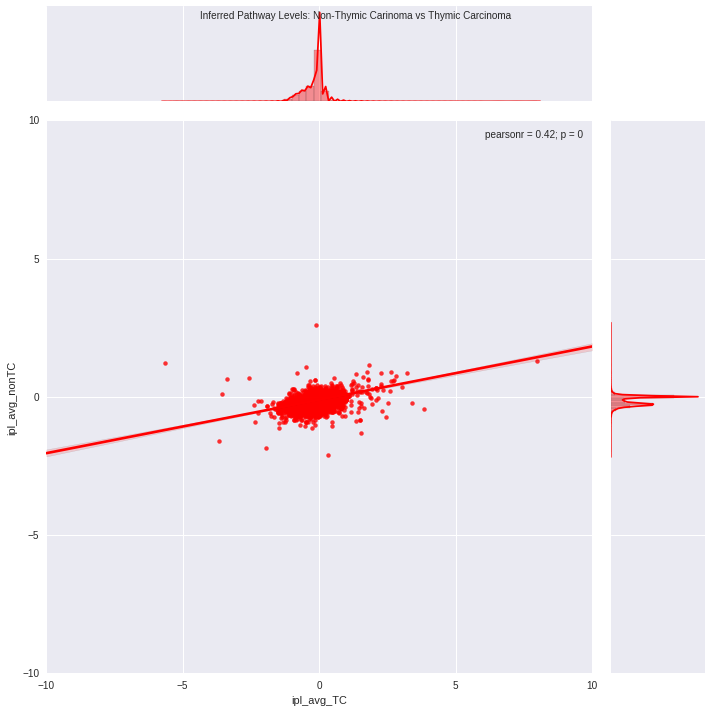

In [71]:
model = pd.ols(y=resort['ipl_avg_TC'], x=resort['ipl_avg_nonTC'])
resort['y_hat'] = model.y_fitted
resort['resid'] = model.resid
# resort.sort_values(by=['ks_d','resid'], ascending=False).head()
# (df, title, x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', annotate_col='resid', annotate_n=5)
joint_annotate(resort, title='Inferred Pathway Levels: Non-Thymic Carinoma vs Thymic Carcinoma', 
               x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', 
               annotate_col='y_hat', annotate_n=0)

/home/tjm/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


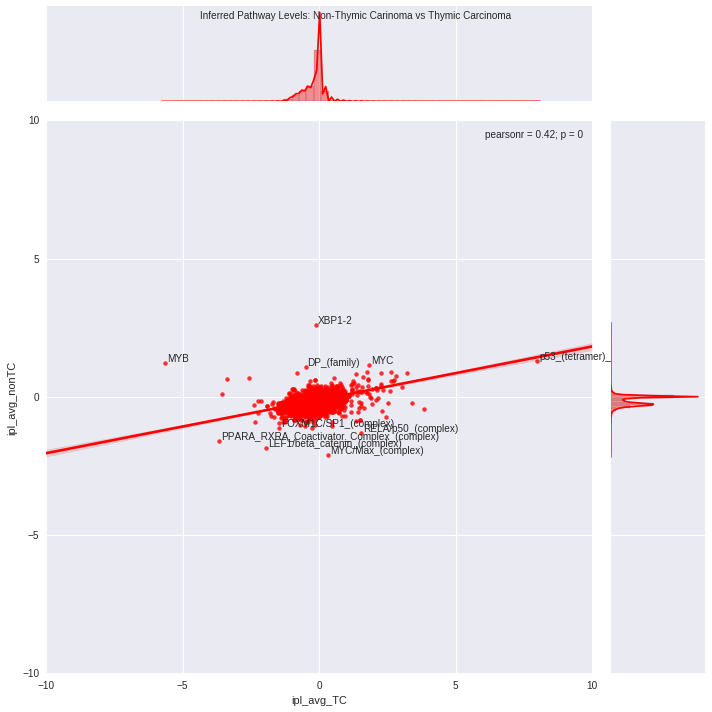

In [69]:
model = pd.ols(y=resort['ipl_avg_TC'], x=resort['ipl_avg_nonTC'])
resort['y_hat'] = model.y_fitted
resort['resid'] = model.resid
# resort.sort_values(by=['ks_d','resid'], ascending=False).head()
# (df, title, x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', annotate_col='resid', annotate_n=5)
joint_annotate(resort, title='Inferred Pathway Levels: Non-Thymic Carinoma vs Thymic Carcinoma', 
               x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', 
               annotate_col='y_hat', annotate_n=5)

/home/tjm/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


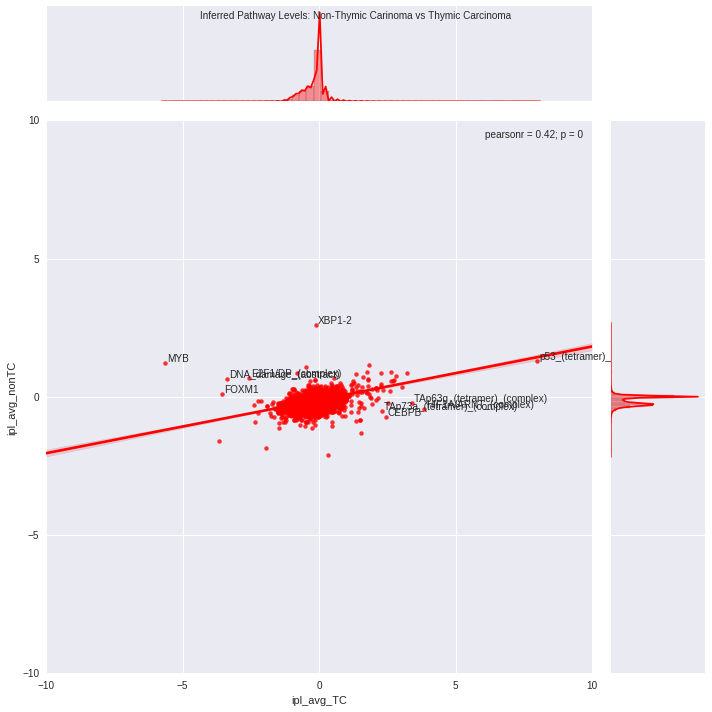

In [70]:
model = pd.ols(y=resort['ipl_avg_TC'], x=resort['ipl_avg_nonTC'])
resort['y_hat'] = model.y_fitted
resort['resid'] = model.resid
# resort.sort_values(by=['ks_d','resid'], ascending=False).head()
# (df, title, x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', annotate_col='resid', annotate_n=5)
joint_annotate(resort, title='Inferred Pathway Levels: Non-Thymic Carinoma vs Thymic Carcinoma', 
               x_name='ipl_avg_TC', y_name='ipl_avg_nonTC', 
               annotate_col='resid', annotate_n=5)

In [72]:
resort.sort_values(by='resid').head(10)

,ks_d,ks_p,tt_s,tt_p,ipl_avg_TC,ipl_avg_nonTC,y_hat,resid
Gene,,,,,,,,
MYB,0.594595,0.005404,-2.214902,0.028704,-5.647271,1.209096,1.061789,-6.709060
DNA_damage_(abstract),0.657658,0.001442,-3.070715,0.002656,-3.382907,0.649082,0.551724,-3.934631
FOXM1,0.405405,0.127933,-1.425394,0.156706,-3.558377,0.087426,0.040162,-3.598539
E2F1/DP_(complex),0.441441,0.076804,-1.673573,0.096886,-2.562391,0.673153,0.573648,-3.136039
XBP1-2,0.256757,0.639749,-0.763740,0.446560,-0.108966,2.600642,2.329222,-2.438188
PPARA_RXRA_Coactivator_Complex_(complex),0.325450,0.338420,-0.906657,0.366452,-3.674030,-1.616161,-1.511480,-2.162549
APOBEC3G_(family),0.657658,0.001442,-3.203834,0.001748,-2.393249,-0.299927,-0.312643,-2.080606
G1_phase_of_mitotic_cell_cycle_(abstract),0.639640,0.002132,-2.899626,0.004463,-2.224466,-0.170339,-0.194612,-2.029854
SHC1_(family),0.639640,0.002132,-2.923727,0.004154,-2.129429,-0.140487,-0.167423,-1.962006


In [ ]:
%matplotlib inline
joint_annotate(a_stage, title='Stage I/II vs III/IV, Cluster "A-like"', x_name='ipl_avg_late', y_name='ipl_avg_early', annotate_col='resid', annotate_n=5)

(0.41943393793298711, 0.0)


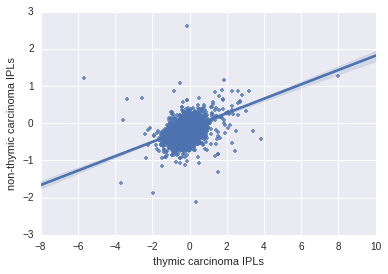

In [48]:
%matplotlib inline
# resort = pd.read_csv('tc_notc')
x, y = pd.Series(resort.ipl_avg_TC, name="thymic carcinoma IPLs"), pd.Series(resort.ipl_avg_nonTC, name="non-thymic carcinoma IPLs")
ax = sns.regplot(x=x, y=y, marker="+")
print(stats.pearsonr(x,y))

In [51]:
x, y = pd.Series(resort.ipl_avg_TC, name="thymic carcinoma IPLs"), pd.Series(resort.ipl_avg_nonTC, name="non-thymic carcinoma IPLs")
# quartiles for drawing:
x_10, x_90 = np.percentile(x, 10), np.percentile(x, 90)
y_10, y_90 = np.percentile(y, 10), np.percentile(y, 90)
print(x_10, x_90)
print(y_10, y_90)
print(stats.pearsonr(x,y))


-0.7178275 0.1302448375
-0.351633466667 0.0157730289369
(0.41943393793298711, 0.0)


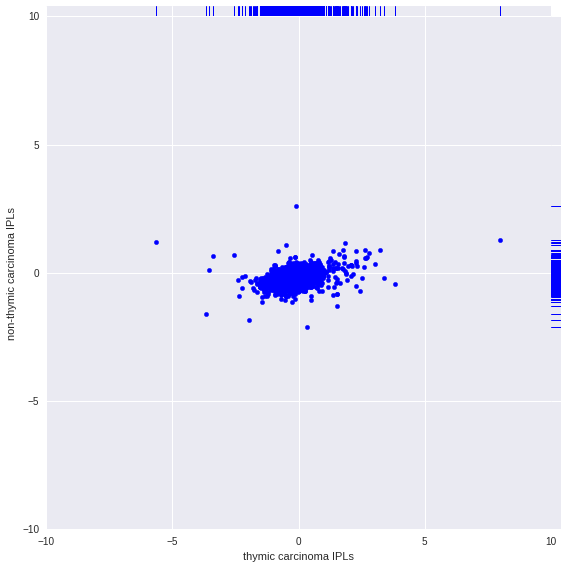

In [57]:
%matplotlib inline
# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y,xlim=(-10, 10), ylim=(-10, 10),space=0, size=8, ratio=50)
grid.plot_joint(plt.scatter,  color="b")
grid.plot_marginals(sns.rugplot, height=1, color="b")
# plt.plot([x_10, x_10], [-3, 3], linestyle='dashed', linewidth=1) #x10
# plt.plot([x_90, x_90], [-3, 3], linestyle='dashed', linewidth=1) #x90
# plt.plot([-8, 10], [y_10, y_10], linestyle='dashed', linewidth=1) #y10
# plt.plot([-8, 10], [y_90, y_90], linestyle='dashed', linewidth=1) #y90


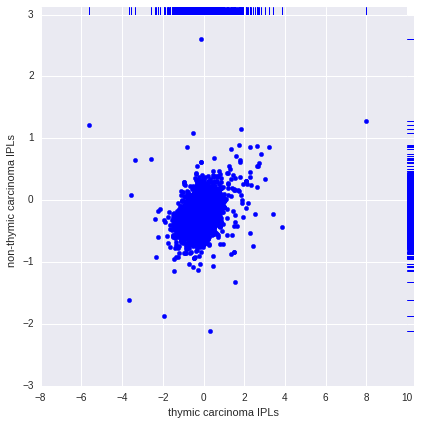

In [53]:
%matplotlib inline
# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y,space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, height=1, color="b")
# plt.plot([x_10, x_10], [-3, 3], linestyle='dashed', linewidth=1) #x10
# plt.plot([x_90, x_90], [-3, 3], linestyle='dashed', linewidth=1) #x90
# plt.plot([-8, 10], [y_10, y_10], linestyle='dashed', linewidth=1) #y10
# plt.plot([-8, 10], [y_90, y_90], linestyle='dashed', linewidth=1) #y90

In [ ]:
tc_v_nontc = pd.DataFrame(resort["ipl_avg_TC"])
tc_v_nontc["ipl_avg_nonTC"] = resort["ipl_avg_nonTC"]

model = pd.ols(y=tc_v_nontc.ipl_avg_TC, x=tc_v_nontc.ipl_avg_nonTC)
tc_v_nontc['y_hat'] = model.y_fitted
tc_v_nontc['resid'] = model.resid
tcvntc = tc_v_nontc.sort(['resid'], ascending=[False])

In [ ]:
tcvntc.head(10)  #.sort(['ipl_avg_nonTC'], ascending=[False])

In [ ]:
resort.loc[(resort.ks_d > 0.5) & (resort.ks_p < 0.05)]

In [ ]:
resort.sort(['ipl_avg_TC'], ascending=[True])

In [ ]:
resort.tail(10)

In [ ]:
# stage I & II vs stage III & IV
df = pd.read_table('/home/tjm/Documents/tcga/thym/tumormap/merge_merged_reals.txt', index_col='Gene')
early = list(sample_df.loc[sample_df['masaoka_stage'].isin(['I','IIa','IIb'])].index)
late = list(sample_df.loc[sample_df['masaoka_stage'].isin(['III','IVa','IVb'])].index)

res = calcstats(df, early, late)
resort_ = res.loc[:, 'ks_d':'avg_grp2'].sort(['avg_grp1'], ascending=[False])
resort_.columns = ['ks_d', 'ks_p', 'tt_s', 'tt_p', 'ipl_avg_I_II', 'ipl_avg_III_IV']
# resort_.to_csv('early_late')
fresort_ = resort_.loc[(resort_.ks_d > 0.3) & (resort_.ks_p < 0.05)]
pd.concat([fresort_.head(100),fresort_.tail(100)]).to_csv('early_late_100')

In [ ]:
x, y = pd.Series(resort_.ipl_avg_I_II, name="Masaoka Stage I & II"), pd.Series(resort_.ipl_avg_III_IV, name="Masaoka Stage III & IV")
# quartiles for drawing:
x_10, x_90 = np.percentile(x, 10), np.percentile(x, 90)
y_10, y_90 = np.percentile(y, 10), np.percentile(y, 90)
print(x_10, x_90)
print(y_10, y_90)
print(stats.pearsonr(x,y))

In [ ]:
resort_.loc[(resort_.ks_d > 0.5) & (resort_.ks_p < 0.05)]

In [ ]:
late_v_carc = pd.DataFrame(resort_["ipl_avg_III_IV"])
late_v_carc["ipl_avg_TC"] = resort["ipl_avg_TC"]
late_v_carc.columns

In [ ]:

model = pd.ols(y=late_v_carc.ipl_avg_TC, x=late_v_carc.ipl_avg_III_IV)
late_v_carc['y_hat'] = model.y_fitted
late_v_carc['resid'] = model.resid
lvcsort = late_v_carc.sort(['resid'], ascending=[False])
lvcsort.head(10)

In [ ]:
lvcsort.tail(10)

(0.64295558554916665, 0.0)


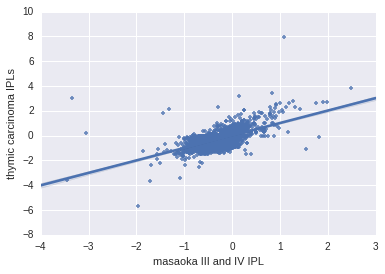

In [50]:
# grpah TC vs late stage
%matplotlib inline
resort_ = pd.read_csv('early_late')
x, y = pd.Series(resort_.ipl_avg_III_IV, name="masaoka III and IV IPL"), pd.Series(resort.ipl_avg_TC, name="thymic carcinoma IPLs")
ax = sns.regplot(x=x, y=y, marker="+")
print(stats.pearsonr(x,y))

In [ ]:
resort.loc[(resort['ipl_avg_TC'] > 7) & df['ipl_avg_nonTC'].isin(some_values)]